In [1]:
import pandas as pd
import ast
import numpy as np

In [3]:
df=pd.read_csv('C:/Users/ashi0/Downloads/keywords.csv')
df

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...
46414,439050,"[{'id': 10703, 'name': 'tragic love'}]"
46415,111109,"[{'id': 2679, 'name': 'artist'}, {'id': 14531,..."
46416,67758,[]
46417,227506,[]


In [4]:
df['keywords']=df['keywords'].apply(ast.literal_eval)

In [5]:
# type(df['keywords'][0][1])

In [6]:
df_exploded = df.explode('keywords')
df_exploded

,id,keywords
0,862,"{'id': 931, 'name': 'jealousy'}"
0,862,"{'id': 4290, 'name': 'toy'}"
0,862,"{'id': 5202, 'name': 'boy'}"
0,862,"{'id': 6054, 'name': 'friendship'}"
0,862,"{'id': 9713, 'name': 'friends'}"
...,...,...
46415,111109,"{'id': 14531, 'name': 'play'}"
46415,111109,"{'id': 215397, 'name': 'pinoy'}"
46416,67758,NaN
46417,227506,NaN


In [7]:
def name(x):
    if isinstance(x,dict)==True:
        getx=x["name"]
        return getx
    else:
        return np.nan

In [8]:
def id(x):
    if isinstance(x,dict)==True:
        getid=x["id"]
        return getid
    else:
        return np.nan

In [9]:
df_exploded['keywords_name']=df_exploded['keywords'].apply(lambda x:name(x))
df_exploded['keywords_id']=df_exploded['keywords'].apply(lambda x:id(x))

In [10]:
df_exploded.dropna(inplace=True)

In [11]:
df_exploded['keywords_id']=df_exploded['keywords_id'].astype(int)
df_exploded.sort_values(by='keywords_id')

,id,keywords,keywords_name,keywords_id
2903,476,"{'id': 30, 'name': 'individual'}",individual,30
2881,492,"{'id': 30, 'name': 'individual'}",individual,30
7918,436,"{'id': 30, 'name': 'individual'}",individual,30
286,527,"{'id': 30, 'name': 'individual'}",individual,30
5588,225,"{'id': 30, 'name': 'individual'}",individual,30
...,...,...,...,...
20815,229768,"{'id': 238854, 'name': 'one dollar'}",one dollar,238854
13252,15584,"{'id': 238855, 'name': 'title appears in writi...",title appears in writing,238855
42679,407204,"{'id': 238856, 'name': 'petanque'}",petanque,238856
42679,407204,"{'id': 238857, 'name': 'disfigured'}",disfigured,238857


In [12]:
df_exploded['keywords_id'].value_counts()

keywords_id
187056    3115
10183     1930
9826      1308
818        835
4344       734
          ... 
227095       1
207939       1
155591       1
238511       1
209358       1
Name: count, Length: 19956, dtype: int64

In [13]:
print(df_exploded['keywords_name'].value_counts())

keywords_name
woman director      3115
independent film    1930
murder              1308
based on novel       835
musical              734
                    ... 
longest film           1
figher airplane        1
all girl               1
ancient scroll         1
acab                   1
Name: count, Length: 19956, dtype: int64


In [16]:
df_cleaned = df_exploded.dropna()

In [29]:
df_cleaned

,id,keywords,keywords_name,keywords_id
0,862,"{'id': 931, 'name': 'jealousy'}",jealousy,931
0,862,"{'id': 4290, 'name': 'toy'}",toy,4290
0,862,"{'id': 5202, 'name': 'boy'}",boy,5202
0,862,"{'id': 6054, 'name': 'friendship'}",friendship,6054
0,862,"{'id': 9713, 'name': 'friends'}",friends,9713
...,...,...,...,...
46411,289923,"{'id': 11800, 'name': 'mockumentary'}",mockumentary,11800
46414,439050,"{'id': 10703, 'name': 'tragic love'}",tragic love,10703
46415,111109,"{'id': 2679, 'name': 'artist'}",artist,2679
46415,111109,"{'id': 14531, 'name': 'play'}",play,14531


In [18]:
df_cleaned.columns

Index(['id', 'keywords', 'keywords_name', 'keywords_id'], dtype='object')

In [19]:
df_cleaned.dtypes

id                int64
keywords         object
keywords_name    object
keywords_id       int32
dtype: object

In [31]:
eda_dictionary = {
    "df_cleaned": {
        "Total Rows": df.shape[0],
        "Total Columns": df.shape[1],
        "Columns": list(df.columns),
        "Missing Values": df.isnull().sum().to_dict(),
        "Data Types": df.dtypes.to_dict(),
        "Summary": df.describe().to_dict(),
    }}

In [32]:
eda_dictionary


{'df_cleaned': {'Total Rows': 46419,
  'Total Columns': 2,
  'Columns': ['id', 'keywords'],
  'Missing Values': {'id': 0, 'keywords': 0},
  'Data Types': {'id': dtype('int64'), 'keywords': dtype('O')},
  'Summary': {'id': {'count': 46419.0,
    'mean': 109769.95187315538,
    'std': 113045.78025568469,
    'min': 2.0,
    '25%': 26810.5,
    '50%': 61198.0,
    '75%': 159908.5,
    'max': 469172.0}}}}

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

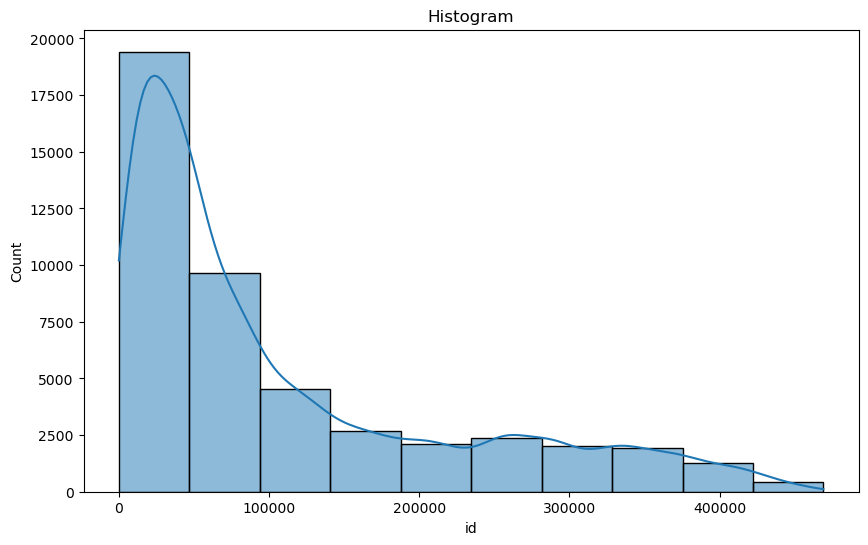

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(df['id'], bins=10, kde=True)
plt.title('Histogram')
plt.show()